## Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# DecisionTreeClassifier

In [3]:
df1 = pd.read_csv('salaries.csv')
df1

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [4]:
df1.tail()

,company,job,degree,salary_more_then_100k
11,facebook,sales executive,masters,1
12,facebook,business manager,bachelors,1
13,facebook,business manager,masters,1
14,facebook,computer programmer,bachelors,1
15,facebook,computer programmer,masters,1


In [5]:
X = df1.iloc[:, :-1]  
X

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [6]:
y = df1.iloc[:, -1]  
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
l_company = LabelEncoder()
l_job = LabelEncoder()
l_deg = LabelEncoder()

In [9]:
X['Company_n'] = l_company.fit_transform(X['company'])

In [10]:
X['job_n'] = l_job.fit_transform(X['job'])

In [11]:
X['degree_n'] = l_deg.fit_transform(X['degree'])

In [12]:
X

,company,job,degree,Company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [13]:
X = X.drop(columns=['company', 'job', 'degree'])
X

,Company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

12
4
12
4


In [16]:
from sklearn import tree

In [17]:
model = tree.DecisionTreeClassifier()

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
pred = model.predict(X_test)
pred

array([0, 0, 0, 1], dtype=int64)

In [20]:
model.score(X_train,y_train)

1.0

In [21]:
model.score(X_test,y_test)

0.75

In [22]:
model.score(X_test,pred)

1.0

In [23]:
y_pre = model.predict([[2,0,0]])


In [24]:
print(y_pre)

[1]


In [25]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

In [26]:
from sklearn.metrics import classification_report

In [27]:
cm = confusion_matrix(y_test,pred)
cm

array([[2, 0],
       [1, 1]], dtype=int64)

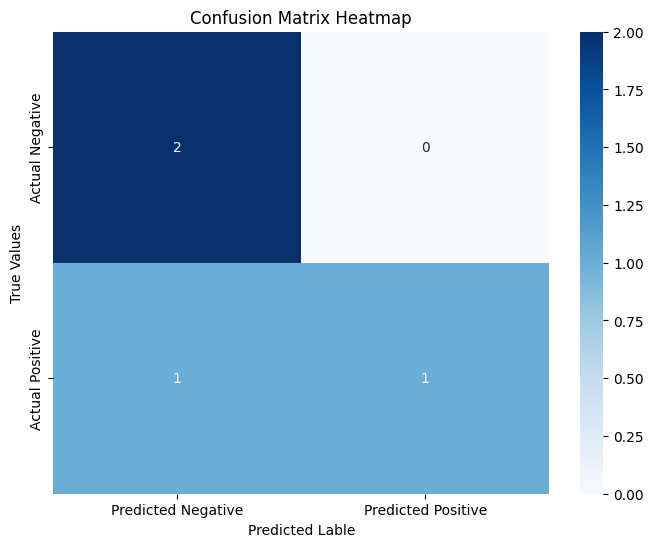

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Lable')
plt.ylabel('True Values')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [29]:
cr = classification_report (y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



# DecisionTreeRegressor

In [166]:
df2 = pd.read_csv('Salaries (1).csv')
df2

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


In [167]:
X = df2.iloc[:, :-1]  
X

,rank,discipline,phd,service,sex
0,Prof,B,56,49,Male
1,Prof,A,12,6,Male
2,Prof,A,23,20,Male
3,Prof,A,40,31,Male
4,Prof,B,20,18,Male
...,...,...,...,...,...
73,Prof,B,18,10,Female
74,AssocProf,B,19,6,Female
75,Prof,B,17,17,Female
76,Prof,A,28,14,Female


In [168]:
y = df2.iloc[:, -1]  
y

0     186960
1      93000
2     110515
3     131205
4     104800
       ...  
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

In [169]:
from sklearn.preprocessing import LabelEncoder
l_rank = LabelEncoder()
l_dis = LabelEncoder()
l_gen = LabelEncoder()

In [170]:
X['rank_n'] = l_rank.fit_transform(X['rank'])
X['dis_n'] = l_dis.fit_transform(X['discipline'])
X['gen_n'] = l_gen.fit_transform(X['sex'])

In [171]:
X

,rank,discipline,phd,service,sex,rank_n,dis_n,gen_n
0,Prof,B,56,49,Male,2,1,1
1,Prof,A,12,6,Male,2,0,1
2,Prof,A,23,20,Male,2,0,1
3,Prof,A,40,31,Male,2,0,1
4,Prof,B,20,18,Male,2,1,1
...,...,...,...,...,...,...,...,...
73,Prof,B,18,10,Female,2,1,0
74,AssocProf,B,19,6,Female,0,1,0
75,Prof,B,17,17,Female,2,1,0
76,Prof,A,28,14,Female,2,0,0


In [172]:
X = X.drop(columns=['rank','discipline','sex'])
X

,phd,service,rank_n,dis_n,gen_n
0,56,49,2,1,1
1,12,6,2,0,1
2,23,20,2,0,1
3,40,31,2,0,1
4,20,18,2,1,1
...,...,...,...,...,...
73,18,10,2,1,0
74,19,6,0,1,0
75,17,17,2,1,0
76,28,14,2,0,0


In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [174]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

54
24
54
24


In [175]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [176]:
from sklearn import tree

In [177]:
m = tree.DecisionTreeRegressor(random_state=42)

In [178]:
m.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [179]:
pred = m.predict(X_test)
pred

array([150480., 146856.,  71065.,  92000., 162200., 109954.,  92000.,
       150480., 117912.,  78500., 103994.,  85000., 127512.,  73300.,
       126300., 127512., 123683., 140096., 146856., 110515., 134778.,
       105450., 126300.,  77500.])

In [180]:
m.score(X_train,y_train)

0.9976689580677749

In [181]:
m.score(X_test,y_test)

0.1415602507752889

In [182]:
m.score(X_test,pred)

1.0

In [183]:
from sklearn.metrics import confusion_matrix,r2_score
from sklearn.metrics import classification_report

In [184]:
cm = confusion_matrix(y_test,pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [185]:
r2 = r2_score(y_test,pred)
r2

0.1415602507752889

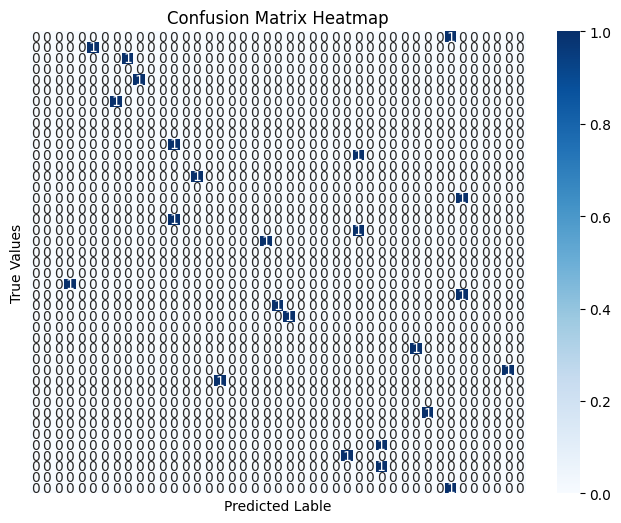

In [186]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[],
            yticklabels=[])
plt.xlabel('Predicted Lable')
plt.ylabel('True Values')
plt.title('Confusion Matrix Heatmap')
plt.show()

<Axes: xlabel='salary', ylabel='Count'>

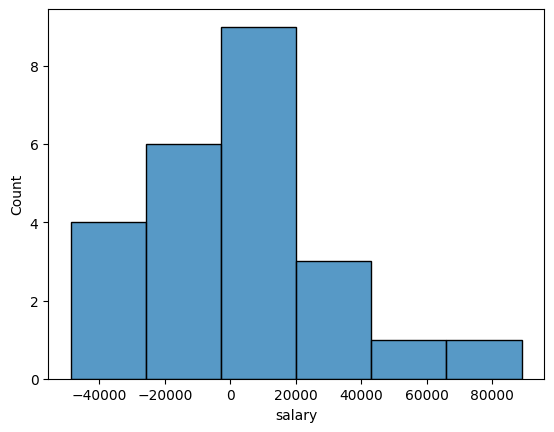

In [187]:
sns.histplot(pred-y_test)

In [188]:
#from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [189]:
mse = mean_squared_error(y_test,pred)
mse

917686021.75

In [190]:
#from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
mae = mean_squared_error(y_test,pred)
mae

917686021.75